In [10]:
# データ読み込み
# pandas…データの統計量を表示、グラフ化など、データ分析（データサイエンス）のライブラリ
# csvファイルのデータを取得し、変数dfに格納
# name列をインデックスとして使用
import pandas as pd
df = pd.read_csv("RandomForest.csv",index_col="index")
# dfの内容を表示
df

,english,math
index,,
1,90,10
2,80,20
3,70,30
4,60,40
5,50,50
6,40,60
7,30,70
8,20,80
9,10,90


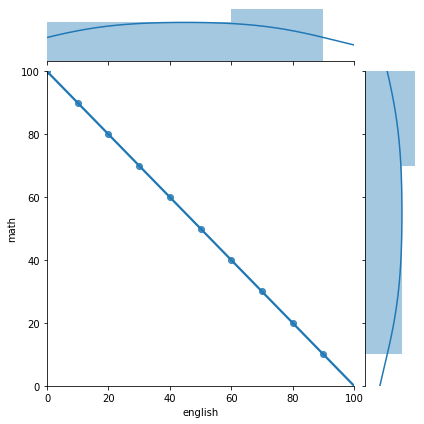

In [11]:
# データをグラフなどで可視化する
# matplotlibのラッパーseabornライブラリを利用する
# 結果はインライン出力する
import seaborn as sns
%matplotlib inline
# 2変数の散布図に線形近似を載せて描画
# この線形近似線が学習結果で、英語の値を代入したものが国語の欠損値代入か？
sns.jointplot(
        x='english'
        ,y='math'
        ,data=df
        ,kind="reg"
        ,xlim=[0, 100]
        ,ylim=[0, 100]
)

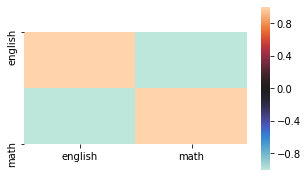

In [13]:
# ヒートマップで相関係数を可視化
import matplotlib.pyplot as plt
# NA / null値を除外して、列のペアワイズ相関を計算
df_corr = df.corr()
fig,ax = plt.subplots(figsize=(5,3))

# 相関係数をヒートマップで表示
sns.heatmap(
            df_corr
            ,square=True
            ,vmax=1
            ,vmin=-1
            ,center=0
           )

In [14]:
# 説明変数、目的変数
X = df.iloc[:, :-1].values
Y = df.loc[:, 'math'].values
print("X:")
print(X)
print("Y:")
print(Y)
# 学習用、検証用データに分割
# test_size:0.0～1.0の割合か、個数を指定、デフォルト0.25
# データの30%をテスト用、70%を学習用とする
# train_size:デフォルトtest_size以外の残り
# random_state:乱数シードの指定
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(
    X
    , Y
    , test_size = 0.3
    , random_state = 666
)
print("X_train:")
print(X_train)
print("X_test:")
print(X_test)
print("Y_train:")
print(Y_train)
print("Y_test:")
print(Y_test)
# 必要なライブラリのインポート（回帰分析用ランダムフォレスト）
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor(n_estimators=10)
forest.fit(X_train, Y_train)

X:
[[90]
 [80]
 [70]
 [60]
 [50]
 [40]
 [30]
 [20]
 [10]
 [ 0]]
Y:
[ 10  20  30  40  50  60  70  80  90 100]
X_train:
[[ 0]
 [60]
 [50]
 [10]
 [80]
 [30]
 [70]]
X_test:
[[40]
 [20]
 [90]]
Y_train:
[100  40  50  90  20  70  30]
Y_test:
[60 80 10]


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [15]:
# 予測値を計算
Y_train_pred = forest.predict(X_train)
Y_test_pred = forest.predict(X_test)
# MSE(平均二乗誤差)の計算
# 0に近いほど良い（誤差がない）
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(Y_train, Y_train_pred), mean_squared_error(Y_test, Y_test_pred)) )
# R^2（決定係数）の計算
# 通常、0から1の値を取り、大きいほどモデルが適切（性能が良い、1は完全一致）
from sklearn.metrics import r2_score
print('R^2 train : %.3f, test : %.3f' % (r2_score(Y_train, Y_train_pred), r2_score(Y_test, Y_test_pred)) )

# 出力
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(Y_train, Y_train_pred), mean_squared_error(Y_test, Y_test_pred)) )
print('R^2 train : %.3f, test : %.3f' % (r2_score(Y_train, Y_train_pred), r2_score(Y_test, Y_test_pred)) )


MSE train : 11.143, test : 140.000
R^2 train : 0.986, test : 0.838
MSE train : 11.143, test : 140.000
R^2 train : 0.986, test : 0.838


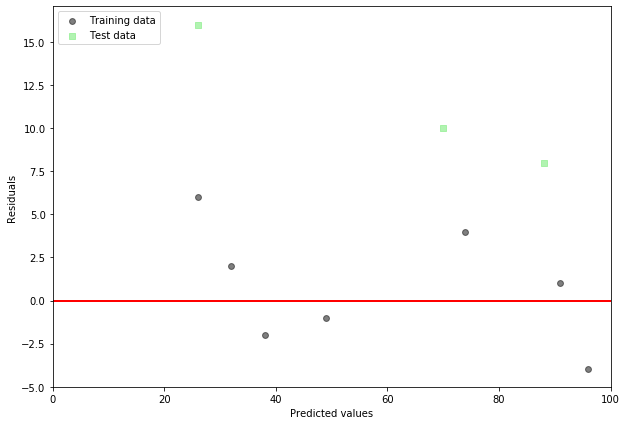

In [17]:
# matplotlibを呼び出し、あとおまじない
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(Y_train_pred
            , Y_train_pred - Y_train
            , c = 'black'
            , marker = 'o'
            , s = 35
            , alpha = 0.5
            , label = 'Training data'
           )
plt.scatter(Y_test_pred
            , Y_test_pred - Y_test
            , c = 'lightgreen'
            , marker = 's'
            , s = 35
            , alpha = 0.7
            , label = 'Test data'
           )
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0
           , xmin = 0
           , xmax = 100
           , lw = 2
           , color = 'red')
plt.xlim([0, 100])
plt.show()